# L5 Gene Regulation (Negative Autoregulation)

## Overview

In this notebook we will implement the model from [Rosenfeld et al.](https://pubmed.ncbi.nlm.nih.gov/12417193/) for a negative autoregulation gene circuit. Negative autoregulation consists of a gene that represses its own expression. This design is a "network motif", meaning that it appears in real transcriptional networks more often than by chance. Hence, it is selected for by biological systems. Why would biological systems want to use this seamingly contradictory circuit? Computational models can help us understand its function. Such models have shown that negative autoregulation can help stabilize steady-state protein concentration, and decreases the response time for protein production.

For additional readig on this topic: Uri Alon, An Introduction To Systems Biology, Chapter 3 "Autoregulation: A Network Motif"


In this notebook, we will explore the response-time-decreasing function of negative autoregulation. We will do this by implementing computational models for two different scenarios and contrasting their functions. The first scenario is an unregulated gene circuit, that produces protein at a constant rate. The second scenario is a gene circuit with negative autoregulation. These two scenarios are presented in Rosenfeld et al. Figure 1.

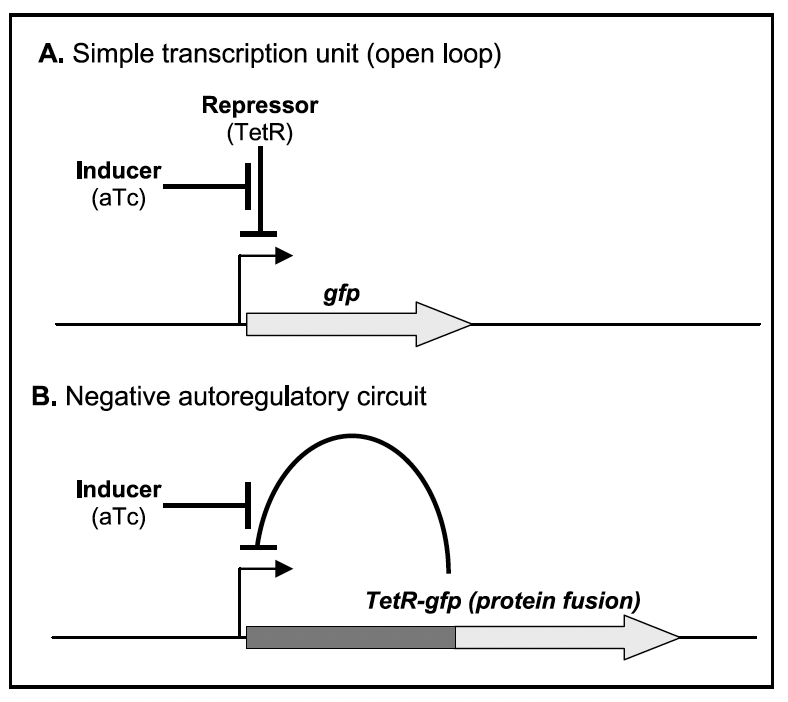

In [ ]:
%reset

In [1]:
# Imports
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

### A Model for Protein Dynamics

We will start with a simple model of protein production. The general form for this equation, as presented in the paper, is given as:

$\large \frac{dx(t)}{dt}=A(t)-\alpha x$

Here $A(t)$ can be any time dependent function representing the production of protein $x$, and $-\alpha x$ represents a protein dependent degradation or dilution of the protein.


#### QUESTION 1
1. This model is phenomenological, meaning it does not represent all the details of the system. What are some details that are missing from this model?

### Constant Protein Production

We will start with a simple model where protein is produced at a constant rate $A(t) = \beta_{1}$

This gives us the following dynamics:

$\large \frac{dx_{1}(t)}{dt}=\beta_{1}-\alpha x_{1}$

From this equation we can find the steady-state concentration by setting the rate of change equal to 0 and solving for $x_{1}$:

$\large x_{1}^{st} = \frac{\beta_{1}}{\alpha}$


#### Dynamical Systems Side Note, Graphical Representation of Steady-State:

Another way to think about the steady-state concentration is to plot the positive and negative components of $\frac{dx_{1}}{dt}$. When these two values are equal ($\frac{dx_{1}}{dt}=0$) the system is at steady-state. This graphical representation can often be a useful way to think about the steady-states of non-linear systems. From this plot we can also see that the positive component is greater than the negative to the left of the steady-state, and the negative component is greater to the right. This means that the system will move towards the steady-state, making this a stable fixed point of the system.

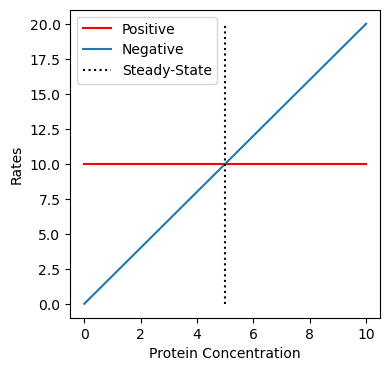

In [2]:
# plotting steady-state
beta_1 = 10
alpha = 2
x_st = beta_1/alpha

x = np.linspace(0,10,100)

[fig,axs] = plt.subplots(1,1,figsize=[4,4])
axs.plot([x[0],x[-1]],[beta_1,beta_1],'r')
axs.plot(x,alpha*x)
axs.plot([x_st,x_st],[0,np.max(alpha*x)],':k')

axs.set_xlabel('Protein Concentration')
axs.set_ylabel('Rates')
axs.legend(['Positive','Negative','Steady-State']);

#### Constant Protein Production Dynamics

We will code the differential equation above to simulate the protein production dynamics. In the paper the time dependence of protein concentration is solved for analyitcally but here we will use numerical simulations of differential equations to check the analytical results and avoid simplifying assumptions.

We will introduce a general expression for the protein degradation $\alpha = ln(2)(\frac{1}{\tau}+\frac{1}{\tau_{deg}})$. Where $\tau$ is the cell division time and $\tau_{deg}$ is the active protein degradation half-life time. This equation is described in the paper in the "Effects of Protein Degradation" section. 

In [3]:
# Define function for constant production
def CP_dynamics(t,y,beta_1,tau,tau_deg):    
    #y = protein (only one dynamic variable so we don't need a vector fo y's)
    
    alpha = np.log(2)*(1/tau+1/tau_deg)
    dydt = beta_1 - alpha*y
    
    return dydt

In [4]:
# Simulate dynamics
# Parameters
beta_1 = 10 # [conc/time]
tau = 1 # [1/time]
tau_deg = 1000 # [1/time] start with a high number to assume no degradation

# Initial Conditions
y0 = [0] #start with no initial protein
# time span
t = np.linspace(0,10,1000)
tspan = [t[0],t[-1]]

ode_sol = solve_ivp(lambda t,y:CP_dynamics(t,y,beta_1,tau,tau_deg),tspan,y0,t_eval=t)


Text(0, 0.5, 'protein concentration')

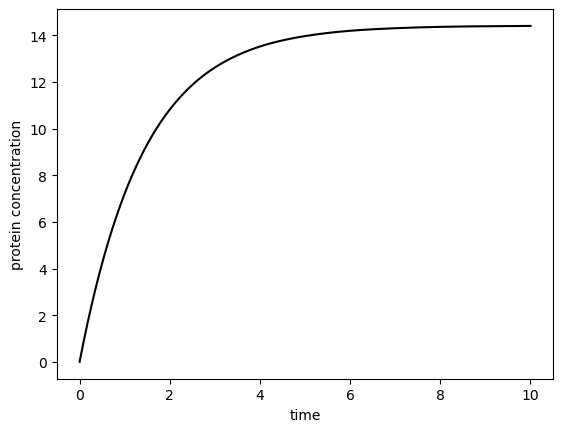

In [5]:
# plot
plt.plot(t,ode_sol.y[0],'k-')
plt.xlabel('time')
plt.ylabel('protein concentration')


To quantify the speed of the dynamics, we will use the rise-time $t_{r}$. The rise time is defined as the time at which the protein concentration reaches half of the steady-state $x_{1}(t_{r})=\frac{x_{1}^{st}}{2}$. 

In the paper, the rise time (with no active protein degradation) was calculated to be equal to the cell division time $\tau$. We can also estimate the rise time by finding the point in our simulation when the protein concentration equals half of the steady-state concentration. We will calculate both the analytical and the numerically estimated rise-times below.

In [6]:
t_r_a = tau #analytical rise-time
alpha = np.log(2)*(1/tau+1/tau_deg)
x_st = beta_1/alpha
t_r_e = t[np.argmin(np.abs(ode_sol.y[0]-x_st/2))] #estimate rise-time by finding point in dynamics where protein concentration is closest to half of steady-state

print('Rise-Time (Analytical Calculation):',np.round(t_r_a,3),'; Rise-Time (Numerical Estimation):',np.round(t_r_e,3))


Rise-Time (Analytical Calculation): 1 ; Rise-Time (Numerical Estimation): 1.001


#### QUESTION 2

2. Recreate the plot of protein concentration above.
    * a. Add a horizontal line for the steady-state concentration of protein.
    * b. Add vertical lines for the analytical and estimated rise-times. (Make one of the vertical lines dashed so that both can be seen)

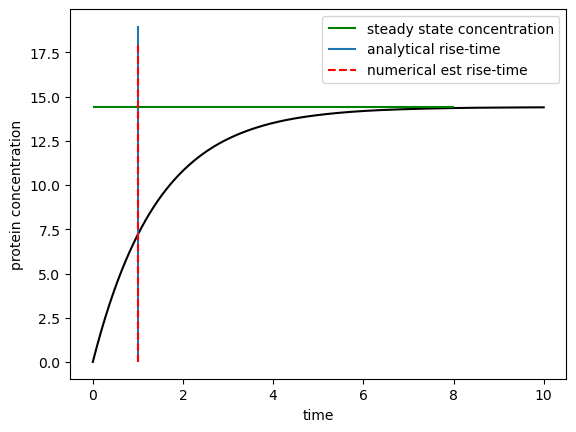

In [28]:
plt.plot(t,ode_sol.y[0],'k-')
plt.xlabel('time')
plt.ylabel('protein concentration')
plt.hlines(x_st,0,8,colors="green", linestyles="solid", label="steady state concentration")
plt.vlines(np.round(t_r_a,3), 0, 19, linestyles="solid", label="analytical rise-time")
plt.vlines(np.round(t_r_e,3), 0, 18, colors="red", linestyles="dashed", label="numerical est rise-time")
plt.legend()

#### QUESTION 3
3. Imagine you are a cell and you can tune the parameters for the activation rate $\beta_{1}$ and the degradation time $\tau_{deg}$. How could you change these two parameters to maintain a constant steady-state concentration of protein but decrease the rise-time to speed up the response?
    * a. Briefly explain how the parameters could be tuned. Hint: use the equations $x_{1}^{st} = \frac{\beta_{1}}{\alpha}$ and $\alpha = ln(2)(\frac{1}{\tau}+\frac{1}{\tau_{deg}})$ to simultaneously change both $\beta_{1}$ and $\tau_{deg}$ in a way that maintains a constant steady state)
    * a. Include a new plot implementing the parameters for your solution.
    * c. Why might increasing protein degradation not be a good biological strategy?

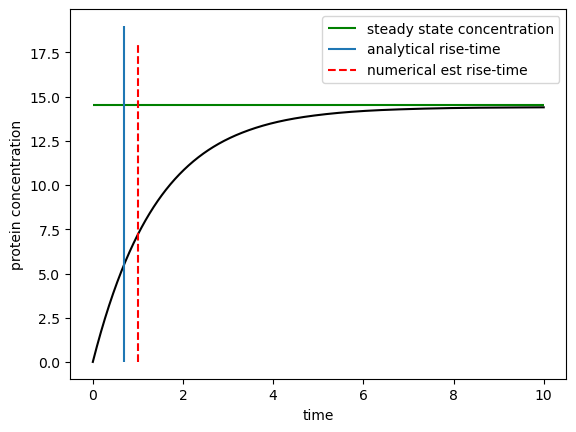

In [44]:
# Parameters
beta_1 = 14.4 # [conc/time]
tau = .7 # [1/time]
tau_deg = 1000 # [1/time] start with a high number to assume no degradation

t_r_a = tau #analytical rise-time
alpha = np.log(2)*(1/tau+1/tau_deg)
x_st = beta_1/alpha
# estimate rise-time by finding point in dynamics where protein concentration 
# is closest to half of steady-state
t_r_e = t[np.argmin(np.abs(ode_sol.y[0]-x_st/2))]

plt.plot(t,ode_sol.y[0],'k-')
plt.xlabel('time')
plt.ylabel('protein concentration')
plt.hlines(x_st,0,10,colors="green", linestyles="solid", label="steady state concentration")
plt.vlines(np.round(t_r_a,3), 0, 19, linestyles="solid", label="analytical rise-time")
plt.vlines(np.round(t_r_e,3), 0, 18, colors="red", linestyles="dashed", label="numerical est rise-time")
plt.legend()

### Negative Autoregulation

Another strategy for improving the speed of the process (decreasing rise-time) is to employ negative autoregulation. In this case the protein that is produced represses its own production. This strategy can acheive faster dynamics without incurring the waste that comes with active protein degredation.

The dynamics for negative autoregulation are represented by replacing the protein production term with a repressor Hill function $A(t) = \frac{\beta_{2}}{1+\frac{x_{2}(t)}{k}}$. The dynamics are then given by:

$\large \frac{dx_{2}(t)}{dt}=\frac{\beta_{2}}{1+\frac{x_{2}}{k}}-\alpha x_{2}$

The steady-state concentration is given as:

$\large x_{2}^{st} = \frac{\sqrt{k^{2}+4(\frac{k\beta_{2}}{\alpha})}-k}{2}$

And the rise-time (with no active protein degredation, only cell division) is calculated as:

$\large t_{r} = 0.21 \tau$

Note: The derivation of this rise time used the assumption that repression of the protein expression is much stronger than the degradation $\frac{\beta_{2}}{\alpha}>>k$, so the analytical and estimated rise-time will disagree when this condition is not satisfied.

We will implement the differential equation for negative autoregulation to explore the dynamics numerically.

In [45]:
# Define function
def NA_dynamics(t,y,beta_2,k,n,tau,tau_deg):    
    #y = protein (only one dynamic variable so we don't need a vector fo y's)
    
    alpha = np.log(2)*(1/tau+1/tau_deg)
    A = beta_2/(1+y**n/k**n)
    dydt = A - alpha*y
    
    return dydt

In [46]:
# Simulate dynamics
# Parameters
tau = 1# [1/time]
tau_deg = 1000 # [1/time] start with a high number to assume no degradation
k = 1
n = 1
alpha = np.log(2)*(1/tau+1/tau_deg)
beta_2 = 10 # [conc/time]

# Initial Conditions
y0 = [0]
# time span
t = np.linspace(0,10,1000)
tspan = [t[0],t[-1]]

ode_sol = solve_ivp(lambda t,y:NA_dynamics(t,y,beta_2,k,n,tau,tau_deg),tspan,y0,t_eval=t)

# Steady-state and rise-time (Analytics)
x_st = (np.sqrt(k**2+4*(k*beta_2/alpha))-k)/2
t_r_a = 0.21*tau

# Rise-time estimation
t_r_e = t[np.argmin(np.abs(ode_sol.y[0]-x_st/2))] #estimate rise-time by finding point in dynamics where protein concentration is closest to half of steady-state


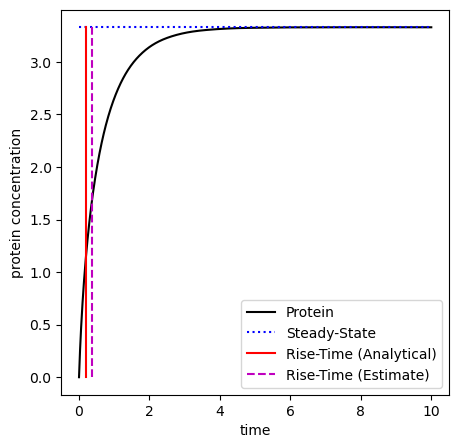

In [47]:
# plot
[fig,axs] = plt.subplots(1,1,figsize=[5,5])

axs.plot(t,ode_sol.y[0],'k-')
axs.set_xlabel('time')
axs.set_ylabel('protein concentration')
axs.plot([t[0],t[-1]],[x_st,x_st],'b:')
axs.plot([t_r_a,t_r_a],[0,x_st],'r')
axs.plot([t_r_e,t_r_e],[0,x_st],'m--')
axs.legend(['Protein','Steady-State','Rise-Time (Analytical)','Rise-Time (Estimate)']);

We can compare the dynamics for the constant protein production and negative autoregulation by setting up two scenarios with the same steady state protein levels.

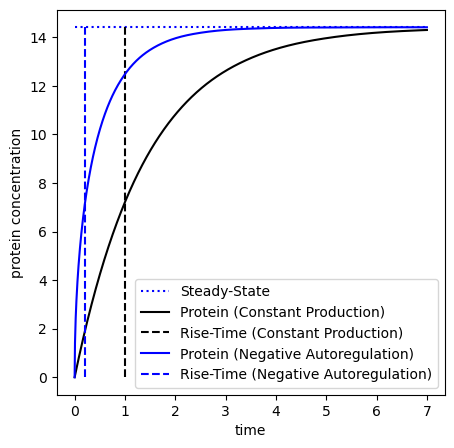

In [71]:
[fig,axs] = plt.subplots(1,1,figsize=[5,5])

# Simulate Constant Protein Production dynamics
# Parameters
tau = 1 # [1/time]
tau_deg = 1000 # [1/time] start with a high number to assume no degradation
alpha = np.log(2)*(1/tau+1/tau_deg)
beta_1 = 10 # [conc/time]
x_st = beta_1/alpha
# Initial Conditions
y0 = [0]
# time span
t = np.linspace(0,7,1000)
tspan = [t[0],t[-1]]
ode_sol = solve_ivp(lambda t,y:CP_dynamics(t,y,beta_1,tau,tau_deg),tspan,y0,t_eval=t)
t_r_a = tau #analytical rise-time
t_r_e = t[np.argmin(np.abs(ode_sol.y[0]-x_st/2))] #estimate rise-time by finding point in dynamics where protein concentration is closest to half of steady-state
# plot
axs.plot([t[0],t[-1]],[x_st,x_st],'b:')
axs.plot(t,ode_sol.y[0],'k-')
axs.set_xlabel('time')
axs.set_ylabel('protein concentration')
axs.plot([t_r_e,t_r_e],[0,x_st],'k--')

# Simulate Negative Autoregulation Protein Production dynamics
# Parameters
# k = 10
k = 1e-3
n = 1
alpha = np.log(2)*(1/tau+1/tau_deg)
beta_2 = (alpha*((2*x_st+k)**2-k**2))/(4*k) # [conc/time] maintain steady-state
# Initial Conditions
y0 = [0]
# time span
ode_sol = solve_ivp(lambda t,y:NA_dynamics(t,y,beta_2,k,n,tau,tau_deg),tspan,y0,t_eval=t)
# Steady-state and rise-time (Analytics)
x_st = (np.sqrt(k**2+4*(k*beta_2/alpha))-k)/2
t_r_a = 0.21*tau
# Rise-time estimation
t_r_e = t[np.argmin(np.abs(ode_sol.y[0]-x_st/2))] #estimate rise-time by finding point in dynamics where protein concentration is closest to half of steady-state
# plot
axs.plot(t,ode_sol.y[0],'b-')
axs.plot([t_r_e,t_r_e],[0,x_st],'b--')

axs.legend(['Steady-State','Protein (Constant Production)','Rise-Time (Constant Production)','Protein (Negative Autoregulation)','Rise-Time (Negative Autoregulation)']);


# QUESTION 4

We can see from the simulation above that the negative autoregulation scheme leads to a faster response.

4. Adjust the parameter $k$. This parameter controls the sensitivity of the repressor to the concentration of the protein. It is analogous to $K_{M}$ from the Michaelis Menten equation. If $k$ is large it takes a large amount of protein to repress expression, if $k$ is small, a small amount of protein represses expression. Note: $\beta$ is defined above based on $k$ so that the steady state concentration remains constant.
   * a. Explain what happens to the rise-time for the negative autoregulation case as $k$ is adjusted?
   * b. Include at least one plot with a different value for $k$ to support your explanation.


#### Effects of mRNA dynamics and Delays

In the paper, the effects of delays on the protein formation are explored. From the paper: "Such delays are due to the cumulative effect of steps such as elongation, termination, ribosome binding and peptide elongation, protein folding, formation of complexes such as dimers, and their diffusion to the DNA-binding site." These delays are introduced by adding a cummulative delay parameter $T$. More specificially, the delay introduced from mRNA dynamics is explicitely modeled by adding differential equations for the mRNA abundance (in the methods section).

We will include these mRNA dynamics in a new model to introduce a delay and explore the effect on the dynamics.

In this new model, the protein production is now proportional to the amount of mRNA ($m$) with proportionality constnat ($\gamma$).

$\large \frac{dx(t)}{dt}=\gamma m-\alpha x$

The mRNA production rate is repressed by the protein $x$ with parameters $\beta_{m}$ and $k_{m}$, and has its own mRNA degradation rate $\alpha_{m}$.

$\large \frac{dm(t)}{dt}=\frac{\beta_{m}}{1+\frac{x}{k_{m}}}-\alpha_{m} m$


In [ ]:
# Define function
def NA_mRNA_dynamics(t,y,beta_m,k_m,gamma,alpha_m,tau,tau_deg):    
    #y[0] = mRNA
    #y[1] = protein
    
    dydt = np.zeros(2)
    
    dydt[0] = beta_m/(1+y[1]/k_m)-alpha_m*y[0]
    
    alpha = np.log(2)*(1/tau+1/tau_deg)
    dydt[1] = gamma_m*y[0]-alpha*y[1]
    
    return dydt

In [ ]:
# Simulate dynamics
# Parameters
tau = 1# [1/time]
tau_deg = 1000 # [1/time] start with a high number to assume no degradation
k_m = 1
beta_m = 10 #
gamma_m = 1
alpha_m = 1

# Initial Conditions
y0 = [0,0]
# time span
t = np.linspace(0,10,1000)
tspan = [t[0],t[-1]]

ode_sol = solve_ivp(lambda t,y:NA_mRNA_dynamics(t,y,beta_m,k_m,gamma_m,alpha_m,tau,tau_deg),tspan,y0,t_eval=t)

# Rise-time estimation
t_r_e = t[np.argmin(np.abs(ode_sol.y[1]-ode_sol.y[1][-1]/2))] #estimate rise-time by finding point in dynamics where protein concentration is closest to half of steady-state


In [ ]:
# plot
[fig,axs] = plt.subplots(1,1,figsize=[5,5])

axs.plot(t,ode_sol.y[0],'g-')
axs.plot(t,ode_sol.y[1],'k-')
axs.set_xlabel('time')
axs.set_ylabel('concentration')
axs.plot([t_r_e,t_r_e],[0,np.max(ode_sol.y[1])],'k--')
axs.legend(['mRNA','Protein','Rise-Time (Estimate)']);

#### QUESTION 5

5. Compare the dynamics for two different scenarios with similar steady state protein concentrations: weak repression (beta = 10, k = 100) and strong repression (beta = 1000, k = 0.1).
    * a. Include a plot for each scenario.
    * b. What is a disadvantage of having very fast response times when we have a delay?


## Appendix: Derivations

### Degradation

$\large \alpha = \frac{ln(2)}{\tau} $

Degradation is assumed to be completely from cell division with a cell division time of $\tau$ the degradation rate is given by the equation above.

We can derive this from the exponential rate of cell division:

$\large x(t) = ce^{-\alpha t}$

After one cell division we will have half of the initial protein remaining:

$\large x(\tau)=\frac{x(0)}{2}$

Using the exponential exponential rate of cell division:

$\large ce^{-\alpha \tau} = \frac{ce^{-\alpha *0}}{2}$

Algebra:

$\large \frac{1}{e^{\alpha \tau}}=\frac{1}{2}$

$\large e^{\alpha \tau}=2$ 

$\large \alpha = \frac{ln(2)}{\tau}$


### Constant Production, Steady-State

$\large x_{1}^{st} = \frac{\beta_{1}}{\alpha}$

The steady-state protein concentration for the constant protein production case can be calculated by setting the protein rate of change equation to 0:

$\large \frac{dx(t)}{dt}=\beta_{1}-\alpha x_{1}^{st} = 0$

Algebra:

$\large x_{1}^{st} = \frac{\beta_{1}}{\alpha}$


### Constant Production, x(t)

The time dependence of protein concentration is presented in the paper as a fraction relative to $x_{1}^{st}$

$\large \frac{x_{1}(t)}{x_{1}^{st}}=1-e^{-\alpha t}$

We can solve for $x_{1}(t)$ by integrating the differential equation for constant production:

$\large \frac{dx_{1}(t)}{dt}=\beta_{1}-\alpha x_{1}$

Re-arrange the equation for integration:

$\large \frac{1}{x_{1}-\frac{\beta_{1}}{\alpha}}dx_{1} = -\alpha dt$

This is a somewhat trivial implementation of u substitution, and then use of $\int\frac{1}{x}dx = ln(x)$

$\large u = x_{1}-\frac{\beta_{1}}{\alpha}$

$\large du = 1 dx_{1}$

$\large \frac{1}{u}du = -\alpha dt$

$\large ln|u| = -\alpha t + c$

$\large ln|x_{1}(t)-\frac{\beta_{1}}{\alpha}| = -\alpha t + c$

$\large x_{1}(t)-\frac{\beta_{1}}{\alpha} = \pm e^{-\alpha t + c}$

$\large x_{1}(t) = \frac{\beta_{1}}{\alpha} \pm Ce^{-\alpha t}$

We know the initial condition is no protein $x_{1}(0) = 0$ so we can use that to solve for the constant C

$\large 0 = \frac{\beta}{\alpha} \pm Ce^{-\alpha * 0}$

$\large \pm C = -\frac{\beta}{\alpha}$

So the final equation for the protein concentration as a function of time is:

$\large x_{1}(t) = \frac{\beta_{1}}{\alpha} - \frac{\beta_{1}}{\alpha}e^{-\alpha t}$

From the above expression for the steady-state protein concentration:

$\large x_{1}^{st} = \frac{\beta_{1}}{\alpha}$

So:

$\large \frac{x_{1}(t)}{x_{1}^{st}}=1-e^{-\alpha t}$


### Constant Production, Rise Time

$\large t_{r} = \tau$

Rise time is defined as the time it takes to reach half of the steady-state protein concentration:

$\large x(t_{r})=\frac{x^{st}}{2}$

The protien dynamics relative to steady-state are described by the equation from above:

$\large \frac{x_{1}(t)}{x_{1}^{st}}=1-e^{-\alpha t}$

At rise time:

$\large \frac{x_{1}(t_{r})}{x_{1}^{st}}=\frac{1}{2}=1-e^{-\alpha t_r}$

$\large e^{-\alpha t_{r}} = \frac{1}{2}$

$\large -\alpha t_{r} = ln(\frac{1}{2})$

$\large t_{r} = \frac{ln(2)}{\alpha}$

Assuming degradation is entirely from cell replication:

$\large \alpha = \frac{ln(2)}{\tau}$

$\large t_{r} = \tau$


### Negative Autoregulation, Hill Functions

In the negative autoregulation case we will introduce a different equation for $A(t)$. Here we will use the "Michaelis-Menten-Like" form, which is a special case of a Hill function.

$\large A_{2}(t) = \frac{\beta_{2}}{1+\frac{x_{2}(t)}{k}}$

Hill functions are generally used to represent gene activation and repression. They are general functions for a sigmoidal function. The Michaelis Menten curve is a special case of a Hill function.

The Hill function for an activator is given by:

$\large f_{a}(x) = C\frac{x^{n}}{k^{n}+x^{n}}$

The Hill function for a repressor given by a negative hill function:

$\large f_{r}(x) = C(1-\frac{x^{n}}{k^{n}+x^{n}})$

$\large f_{r}(x) = C(\frac{k^{n}+x^{n}-x^{n}}{k^{n}+x^{n}})$

$\large f_{r}(x) = C(\frac{k^{n}}{k^{n}+x^{n}})$

The coefficient n is known as the Hill coefficient, and can be used to tune systems that have some level of "cooperativity" or "ultra-sensitivity". 

In the Michaelis Menten kinetics equation, $C$ is the $V_{max}$, $k$ is the $K_{M}$, $n$ is 1, and $x$ is $[S]$ the substrate concentration.

To get the form used in this paper, $n=1$, $C=\beta_{2}$, and we divide numerator and denominator by $k^{n}$.


In [ ]:
# Visualizing Hill Functions

C = 5
n = 1
k = 1
x = np.logspace(-3,3,1000)
f_a = C*(x**n/(k**n+x**n))
f_r = C*(k**n/(k**n+x**n))

[fig,axs] = plt.subplots(1,2,figsize=[8,3])
axs[0].plot(np.log10(x),f_a)
axs[0].set_title('Activator Hill Function')
axs[0].set_xlabel('lgo10(Activator Concentration)')
axs[0].set_ylabel('Reaction Rate')

axs[1].plot(np.log10(x),f_r)
axs[1].set_title('Repressor Hill Function')
axs[1].set_xlabel('log10(Repressor Concentration)')
axs[1].set_ylabel('Reaction Rate')

### Negative Autoregulation, Steady-State

$\large x_{2}^{st} = \frac{\sqrt{k^{2}+4(\frac{k\beta_{2}}{\alpha})}-k}{2}$

The protein dynamics for negative autoregulation are given by:

$\large \frac{dx_{2}(t)}{dt}=\frac{\beta_{2}}{1+\frac{x_{2}}{k}}-\alpha x_{2}$

Steady-state assumption:

$\large \frac{\beta_{2}}{1+\frac{x_{2}^{st}}{k}}-\alpha x_{2}^{st} = 0$

$\large \alpha x_{2}^{st} = \frac{\beta_{2}}{1+\frac{x_{2}^{st}}{k}}$

$\large \alpha x_{2}^{st}(1+\frac{x_{2}^{st}}{k})-\beta_{2} = 0$

$\large (x_{2}^{st})^{2} + k x_{2}^{st} + \frac{-\beta_{2} k}{\alpha} = 0$ 

from here we can use the quadratic formula to solve for the steady-state concentration:

$\large x_{2}^{st} = \frac{-k+\sqrt{k^{2}-4(\frac{-\beta_{2} k}{\alpha})}}{2}$

$\large x_{2}^{st} = \frac{\sqrt{k^{2}+4(\frac{k\beta_{2}}{\alpha})}-k}{2}$

In the paper strong autorepression is assumed $\beta_{2}/\alpha >> k$. With this assumption the k terms are swamped out by the $\beta_{2}/\alpha$ term, yeilding:

$\large x^{st} = \sqrt{k\beta_{2}/\alpha}$



### Negative Autoregulation, x(t)

$\large \frac{x(t)}{x^{st}} = \sqrt{1-e^{-2\alpha t}}$


### Negative Autoregulation, Rise Time

$\large t_{r} = 0.21\tau$

From the equation above we can calculate the rise time:

$\large \frac{1}{2} = \sqrt{1-e^{-2\alpha t_{r}}}$

$\large \frac{1}{4} = 1-e^{-2\alpha t_{r}}$

$\large e^{-2\alpha t_{r}} = \frac{3}{4}$

$\large -2\alpha t_{r} = ln(\frac{3}{4})$

$\large t_{r} = \frac{ln(\frac{3}{4})}{-2\alpha}$

$\large \alpha = \frac{ln(2)}{\tau}$ Assume degradation is from cell division only

$\large t_{r} = \frac{ln(\frac{3}{4})}{-2 ln(2)}\tau$

$\large t_{r} = 0.21 \tau$

In [ ]:
np.log(3/4)/(-2*np.log(2))